<a href="https://colab.research.google.com/github/Robin-Chetry/ml_algo_implemment/blob/main/height_prediction(simple_regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# %matplotlib inline

In [56]:
df=pd.read_csv("height-weight.csv")
df.head()
df.shape

(23, 2)

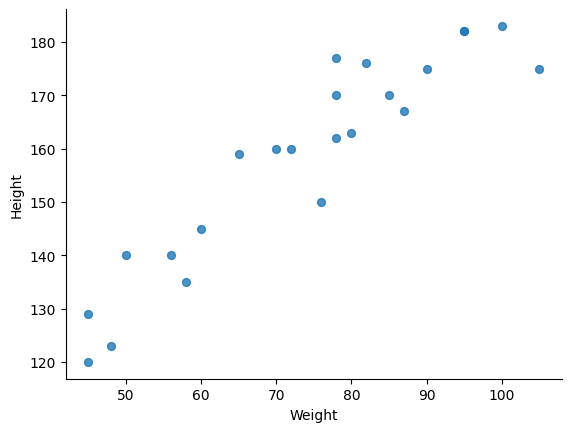

In [57]:
# @title Weight vs Height

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Weight', y='Height', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

Text(0, 0.5, 'height')

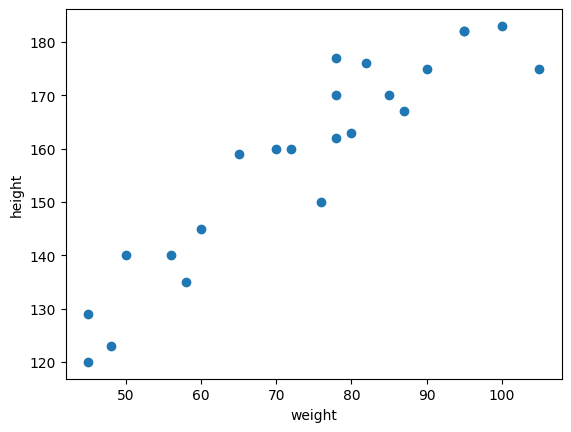

In [58]:
plt.scatter(df["Weight"],df["Height"])
plt.xlabel("weight")
plt.ylabel("height")


In [59]:
X=df[["Weight"]]
y=df["Height"]

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=32)

In [62]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((18, 1), (5, 1), (18,), (5,))

In [63]:
## standardize the dataset Train independent data
from sklearn.preprocessing import StandardScaler

In [64]:
scaler=StandardScaler()

In [65]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

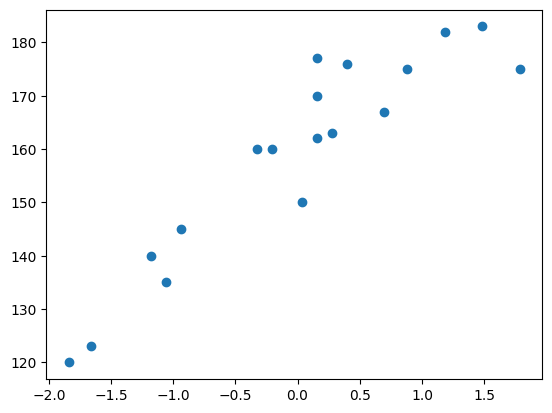

In [66]:
plt.scatter(X_train,y_train)

In [67]:
## Train the Simple Linear Regression Model
from sklearn.linear_model import LinearRegression

In [68]:
regressor=LinearRegression()

In [69]:
regressor.fit(X_train,y_train)

LinearRegression()

In [70]:
print("The slope or coefficient of weight is ",regressor.coef_)
print("Intercept:",regressor.intercept_)

The slope or coefficient of weight is  [17.50402849]
Intercept: 159.05555555555554


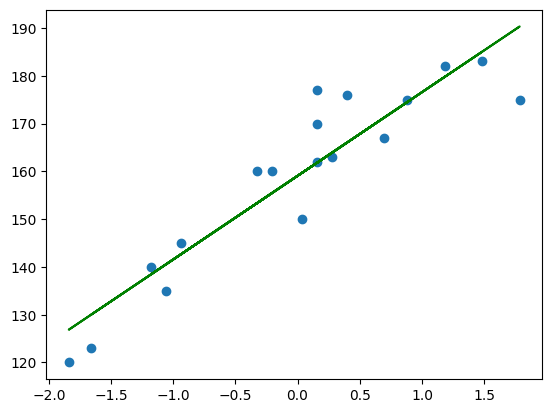

In [71]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regressor.predict(X_train),'g')


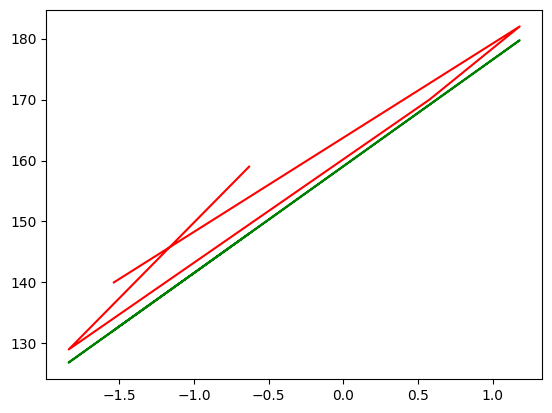

In [72]:
plt.plot(X_test,regressor.predict(X_test),'g')
plt.plot(X_test,y_test,'r')

In [73]:
y_pred_test=regressor.predict(X_test)

In [74]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [75]:
mse=mean_squared_error(y_test,y_pred_test)
mae=mean_absolute_error(y_test,y_pred_test)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

38.58232753802786
4.817866318114224
6.21146742227856


In [76]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred_test)
score

0.8966175575079639

In [77]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.8621567433439519

In [78]:
## new data point weight is 80

scaled_weight=scaler.transform([[50]])
scaled_weight

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-1.53739757]])

In [79]:
print("The height prediction for weight 80 kg is :",regressor.predict([scaled_weight[0]]))

The height prediction for weight 80 kg is : [132.14490467]


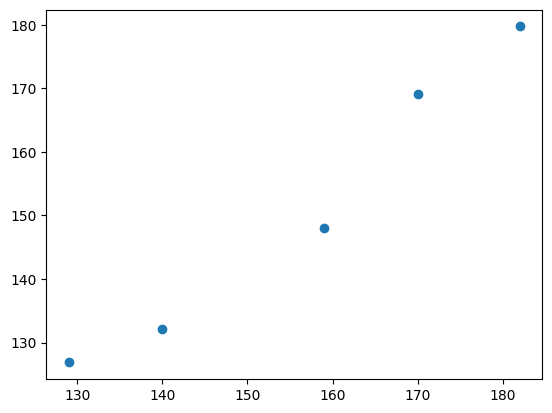

In [80]:
## Assumptions
## plot a scatter plot for the prediction
plt.scatter(y_test,y_pred_test)

In [81]:
## Residuals
residuals=y_test-y_pred_test
residuals

,Height
16,7.855095
8,2.262023
14,0.838261
20,2.143214
17,10.990738


<ipython-input-82-531549f08f17>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals,kde=True)


<Axes: xlabel='Height', ylabel='Density'>

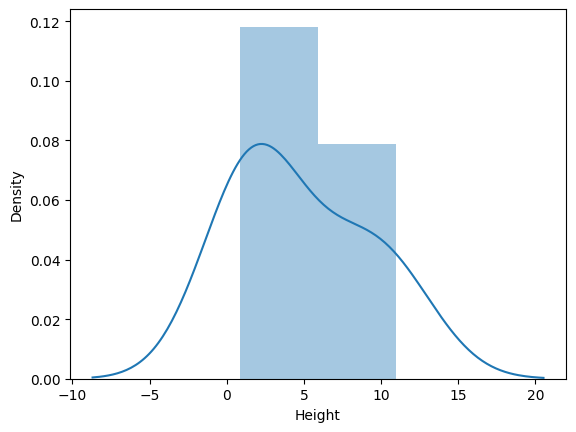

In [82]:
## plot this residuals
import seaborn as sns
sns.distplot(residuals,kde=True)

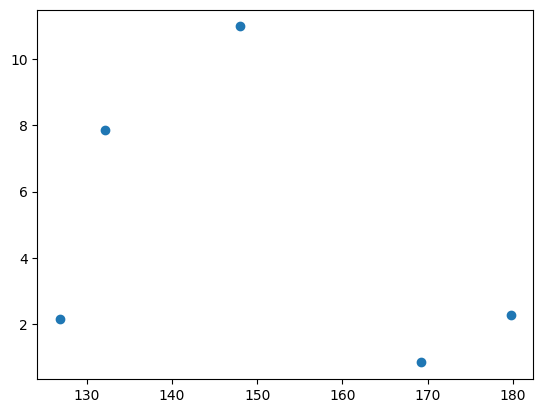

In [83]:
## Scatter plot with respect to prediction and residuals
## uniform distribution
plt.scatter(y_pred_test,residuals)